# Tugas Besar 1 IF3270 Pembelajaran Mesin Feedforward Neural Network

|   NIM    |            NAMA            |
| :------: | :------------------------: |
| 13522037 |    Farhan Nafis Rayhan     |
| 13522091 | Raden Francisco Trianto B. |


## Import Dataset MNIST

In [1]:
import numpy as np
from sklearn.datasets import fetch_openml

X: np.ndarray  # input
y: np.ndarray  # target

# Load data from https://www.openml.org/search?type=data&sort=runs&id=554   
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

 
# MNIST: dataset of 28x28 pixel images of handwritten digits (0-9)
# Input: vector of 784 pixels (28x28)
# Target: number 0-9

In [2]:
X.shape, y.shape

((70000, 784), (70000,))

## Import Model

In [3]:
import sys
import os

# Get the absolute path of the src directory
sys.path.append(os.path.abspath('../')) 

from model.matrix import Matrix
from model.nn import Neuron, Layer, MLP
from model.ffnn import FFNN
from graph.visualize import draw_dot, draw_ffnn

# Limit to 500 samples

In [4]:
X, y = X[:100, 340:350], y[:100]
# X, y = X[:5, :3], y[:5]

In [5]:
MX = Matrix(X)
MX

Matrix with 100 rows and 10 cols
Sample:
[0, 0, 0, 0, 0, 0, 0, 11, 190, 253]
[0, 0, 0, 7, 178, 252, 240, 71, 19, 28]
[254, 120, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 32]
[0, 0, 0, 126, 253, 247, 176, 9, 0, 0]

In [6]:
MXT = MX.transpose()
MXT

Matrix with 10 rows and 100 cols
Sample:
[0, 0, 254, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 118, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 120, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 157, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 253, 0, 0, 0, 0, 0, 0, 0, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 240, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 70, 0, 0, 0, 0, 252, 0, 0, 0, 41, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 55, 5, 0, 201, 0, 57, 0, 116, 0, 253, 0, 0, 0, 0, 0, 0, 0, 226, 0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 73, 0, 0, 0, 0, 0, 0, 0, 0, 36, 0, 0, 252, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 7, 0, 0, 126, 0, 0, 

In [7]:
n = Neuron(5)
n

Neuron(nin=5, activation=relu)

In [8]:
l = Layer(5, 16)
l

Layer of 16 Neuron: [
	Neuron(nin=5, activation=relu)
	Neuron(nin=5, activation=relu)
	Neuron(nin=5, activation=relu)
	Neuron(nin=5, activation=relu)
	Neuron(nin=5, activation=relu)
	Neuron(nin=5, activation=relu)
	Neuron(nin=5, activation=relu)
	Neuron(nin=5, activation=relu)
	Neuron(nin=5, activation=relu)
	Neuron(nin=5, activation=relu)
	Neuron(nin=5, activation=relu)
	Neuron(nin=5, activation=relu)
	Neuron(nin=5, activation=relu)
	Neuron(nin=5, activation=relu)
	Neuron(nin=5, activation=relu)
	Neuron(nin=5, activation=relu)]

In [9]:
nn = MLP(5, [8, 8, 1], "relu")
nn

MLP of 3 Layers [
	Layer of 8 Neuron: [
	Neuron(nin=5, activation=relu)
	Neuron(nin=5, activation=relu)
	Neuron(nin=5, activation=relu)
	Neuron(nin=5, activation=relu)
	Neuron(nin=5, activation=relu)
	Neuron(nin=5, activation=relu)
	Neuron(nin=5, activation=relu)
	Neuron(nin=5, activation=relu)]
	Layer of 8 Neuron: [
	Neuron(nin=8, activation=relu)
	Neuron(nin=8, activation=relu)
	Neuron(nin=8, activation=relu)
	Neuron(nin=8, activation=relu)
	Neuron(nin=8, activation=relu)
	Neuron(nin=8, activation=relu)
	Neuron(nin=8, activation=relu)
	Neuron(nin=8, activation=relu)]
	Layer of 1 Neuron: [
	Neuron(nin=8, activation=linier)]]

In [10]:
ffnn = FFNN(X, y, [4, 3], loss="mse", active=["sigmoid", "relu", "linier"])
ffnn

Fully Connected Feed Forward Neural Network
> X = 100 x 10
> y = 100 x 1
> MLP of 3 Layers [
	Layer of 4 Neuron: [
	Neuron(nin=10, activation=sigmoid)
	Neuron(nin=10, activation=sigmoid)
	Neuron(nin=10, activation=sigmoid)
	Neuron(nin=10, activation=sigmoid)]
	Layer of 3 Neuron: [
	Neuron(nin=4, activation=relu)
	Neuron(nin=4, activation=relu)
	Neuron(nin=4, activation=relu)]
	Layer of 1 Neuron: [
	Neuron(nin=3, activation=linier)]]

In [11]:
f"Amount of param: {len(ffnn.parameters())}"

'Amount of param: 63'

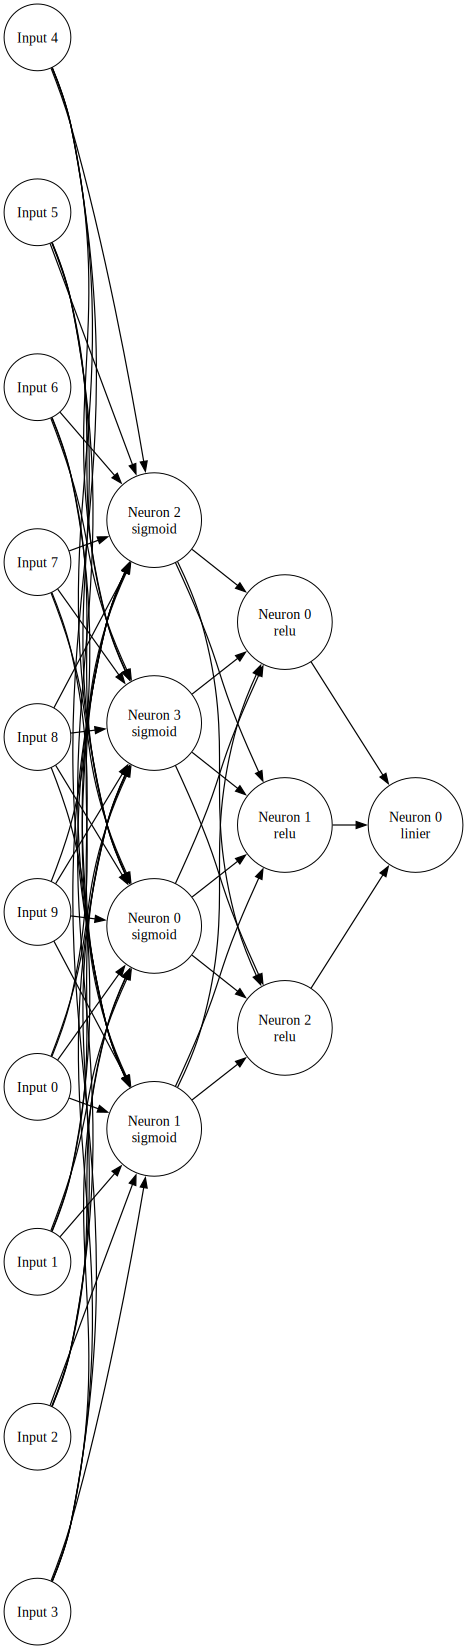

In [12]:
draw_ffnn(ffnn)

In [13]:
# ffnn.backpropagation(loss)
# draw_dot(loss)

In [14]:
loss = ffnn.training(10, 0.01, 10)
draw_dot(loss)

epoch: 0Done training
epoch: 1Done training
epoch: 2Done training
epoch: 3Done training
epoch: 4Done training
epoch: 5Done training
epoch: 6Done training
epoch: 7Done training
epoch: 8Done training
epoch: 9Done training
